# Epoch Extraction for date/timestamp (follow up of #2149)

In [1]:
# t.timestamp_of_birth - ibis.interval(1, 'D')
# Error: Unknown HTML element <int8> on line 1 
# in label of node 7208238078510608626

In [7]:
from datetime import datetime, date

import ibis
import numpy as np
import pandas as pd
# local
from settings import conf
from utils import cursor2df
from gen_data import salary_date, salary_date_schema

ibis.options.interactive = False

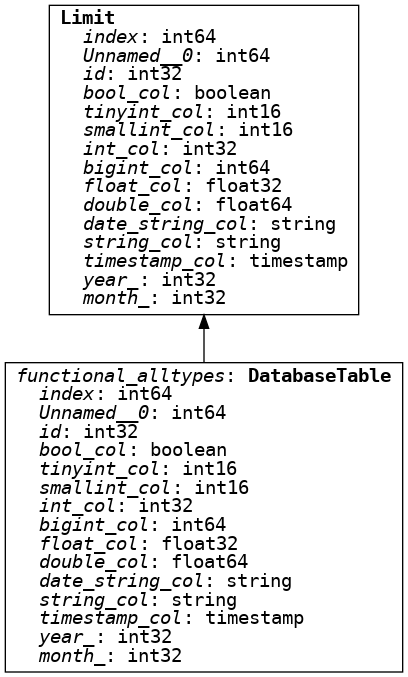

In [8]:
BACKENDS = ['omniscidb', 'postgres']
con = {
    backend: getattr(ibis, backend).connect(**conf[backend]) 
    for backend in BACKENDS
}

con['omniscidb'].table('functional_alltypes').head()

In [4]:
assert False

AssertionError: 

In [ ]:
df_salary1 = salary_date()
print(df_salary1.dtypes)
df_salary1.info()

In [ ]:
sch = salary_date_schema()
sch

In [ ]:
table_name = 'salary'
t = {}
params = {
    'omniscidb': {},
    'postgres': {'if_exists': 'append'}
}

for backend in []:  # BACKENDS
    if hasattr(con[backend], 'load_data'):
        con[backend].drop_table(table_name, force=True)
        con[backend].create_table(table_name, schema=sch)
        con[backend].load_data(table_name, df_salary1, **params[backend])
    t[backend] = con[backend].table(table_name)

In [ ]:
con['omniscidb'].table(table_name)

In [ ]:
t['omniscidb']

In [ ]:
t['omniscidb'].execute()

In [ ]:
_t = t['omniscidb']

In [ ]:
expr = _t.timestamp_of_birth.epoch().name('tmp')
expr = _t[_t.timestamp_of_birth, expr]
print(expr.compile())
expr.execute();

## Tests

In [ ]:
pd.testing.assert_frame_equal(t['omniscidb'].execute(), t['postgres'].execute())

In [ ]:
df = _t.execute()
df

### 1. Epoch

In [ ]:
for b in BACKENDS:
    try:
        print(' {} '.format(b).center(80, '='))
        expr = t[b].timestamp_of_birth.epoch()
        result = expr.execute().values
        expected = df.timestamp_of_birth.dt.dayofyear.values
        print(expr.compile())
        print('.' * 80)
        print('result:', result)
        print('expected:', expected)
        assert all((result == expected))
    except ibis.common.exceptions.OperationNotDefinedError:
        print('[WW] Not implemented.')
    except AssertionError:
        print('[EE] AssertionError')